# Importar las librerias


In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

# Importar csv

In [291]:
df = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')
df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          3  2013      3    1     2   14.0  14.0   NaN   7.0   200.0  22.0   
3          4  2013      3    1     3   12.0  12.0   3.0   5.0     NaN   NaN   
4          5  2013      3    1     4   12.0  12.0   3.0   NaN   200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 18 columns]

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [293]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

In [294]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [295]:
df.corr()

<ipython-input-295-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour   0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5 -0.015254 -9.634280e-03 -2.174714e-02 -3.307878e-03  1.272521e-02   
PM10  -0.041330 -3.261574e-02 -3.433807e-02  2.339710e-02  5.703721e-02   
SO2   -0.152190 -9.614015e-02 -2.156861e-01  3.558958e-03  6.793784e-02   
NO2    0.037972  3.547259e-02  4.153300e-03  2.265277e-02  9.937827e-02   
CO     0.017373  5.590030e-03  4.557975e-02 -1.123206e-02 -8.833878e-03   
O3    -0.063901 -3.581853e-02 -1.081401e-01  1.159392e-02  2.892276e-01   
TEMP  -0.125507 -1.546825e-01  1.307637e-01  1.488135e-02  1.418544e-01   
PRES   0.179139  1.866432e-01 -5.009397e-02  2.854590e-02 -3.976201e-02   
DEWP  -0.101079 -1.623658e-01  2.595380e-01  2.159085e-02 -1.253889e-02   
RAIN  -0.000326 -3.845473e-03  1.508323e-02 -5.620935e-03  1.382567e-02   
WSPM   0.001618  3.113754e-02 -1.201678e-01 -1.114746e-02  1.123977e-01   

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
No    -0.015254 -0.041330 -0.152190  0.037972  0.017373 -0.063901 -0.125507   
year  -0.009634 -0.032616 -0.096140  0.035473  0.005590 -0.035819 -0.154683   
month -0.021747 -0.034338 -0.215686  0.004153  0.045580 -0.108140  0.130764   
day   -0.003308  0.023397  0.003559  0.022653 -0.011232  0.011594  0.014881   
hour   0.012725  0.057037  0.067938  0.099378 -0.008834  0.289228  0.141854   
PM2.5  1.000000  0.900479  0.462489  0.643631  0.782033 -0.134627 -0.115991   
PM10   0.900479  1.000000  0.461586  0.656011  0.711204 -0.116416 -0.084500   
SO2    0.462489  0.461586  1.000000  0.508219  0.513470 -0.148727 -0.308252   
NO2    0.643631  0.656011  0.508219  1.000000  0.673956 -0.448719 -0.309648   
CO     0.782033  0.711204  0.513470  0.673956  1.000000 -0.275064 -0.294600   
O3    -0.134627 -0.116416 -0.148727 -0.448719 -0.275064  1.000000  0.583524   
TEMP  -0.115991 -0.084500 -0.308252 -0.309648 -0.294600  0.583524  1.000000   
PRES  -0.002374 -0.030889  0.211368  0.160261  0.149005 -0.427177 -0.825854   
DEWP   0.125071  0.088852 -0.254797 -0.084656 -0.028039  0.302238  0.823852   
RAIN  -0.007250 -0.022871 -0.038588 -0.051547 -0.006262  0.023443  0.039335   
WSPM  -0.270763 -0.200028 -0.126560 -0.394019 -0.293682  0.308151  0.063226   

           PRES      DEWP      RAIN      WSPM  
No     0.179139 -0.101079 -0.000326  0.001618  
year   0.186643 -0.162366 -0.003845  0.031138  
month -0.050094  0.259538  0.015083 -0.120168  
day    0.028546  0.021591 -0.005621 -0.011147  
hour  -0.039762 -0.012539  0.013826  0.112398  
PM2.5 -0.002374  0.125071 -0.007250 -0.270763  
PM10  -0.030889  0.088852 -0.022871 -0.200028  
SO2    0.211368 -0.254797 -0.038588 -0.126560  
NO2    0.160261 -0.084656 -0.051547 -0.394019  
CO     0.149005 -0.028039 -0.006262 -0.293682  
O3    -0.427177  0.302238  0.023443  0.308151  
TEMP  -0.825854  0.823852  0.039335  0.063226  
PRES   1.000000 -0.762534 -0.063919  0.016456  
DEWP  -0.762534  1.000000  0.087441 -0.256126  
RAIN  -0.063919  0.087441  1.000000  0.028925  
WSPM   0.016456 -0.256126  0.028925  1.000000

<ipython-input-296-4525a46e1f86>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')


<Axes: title={'center': 'Pearson'}>

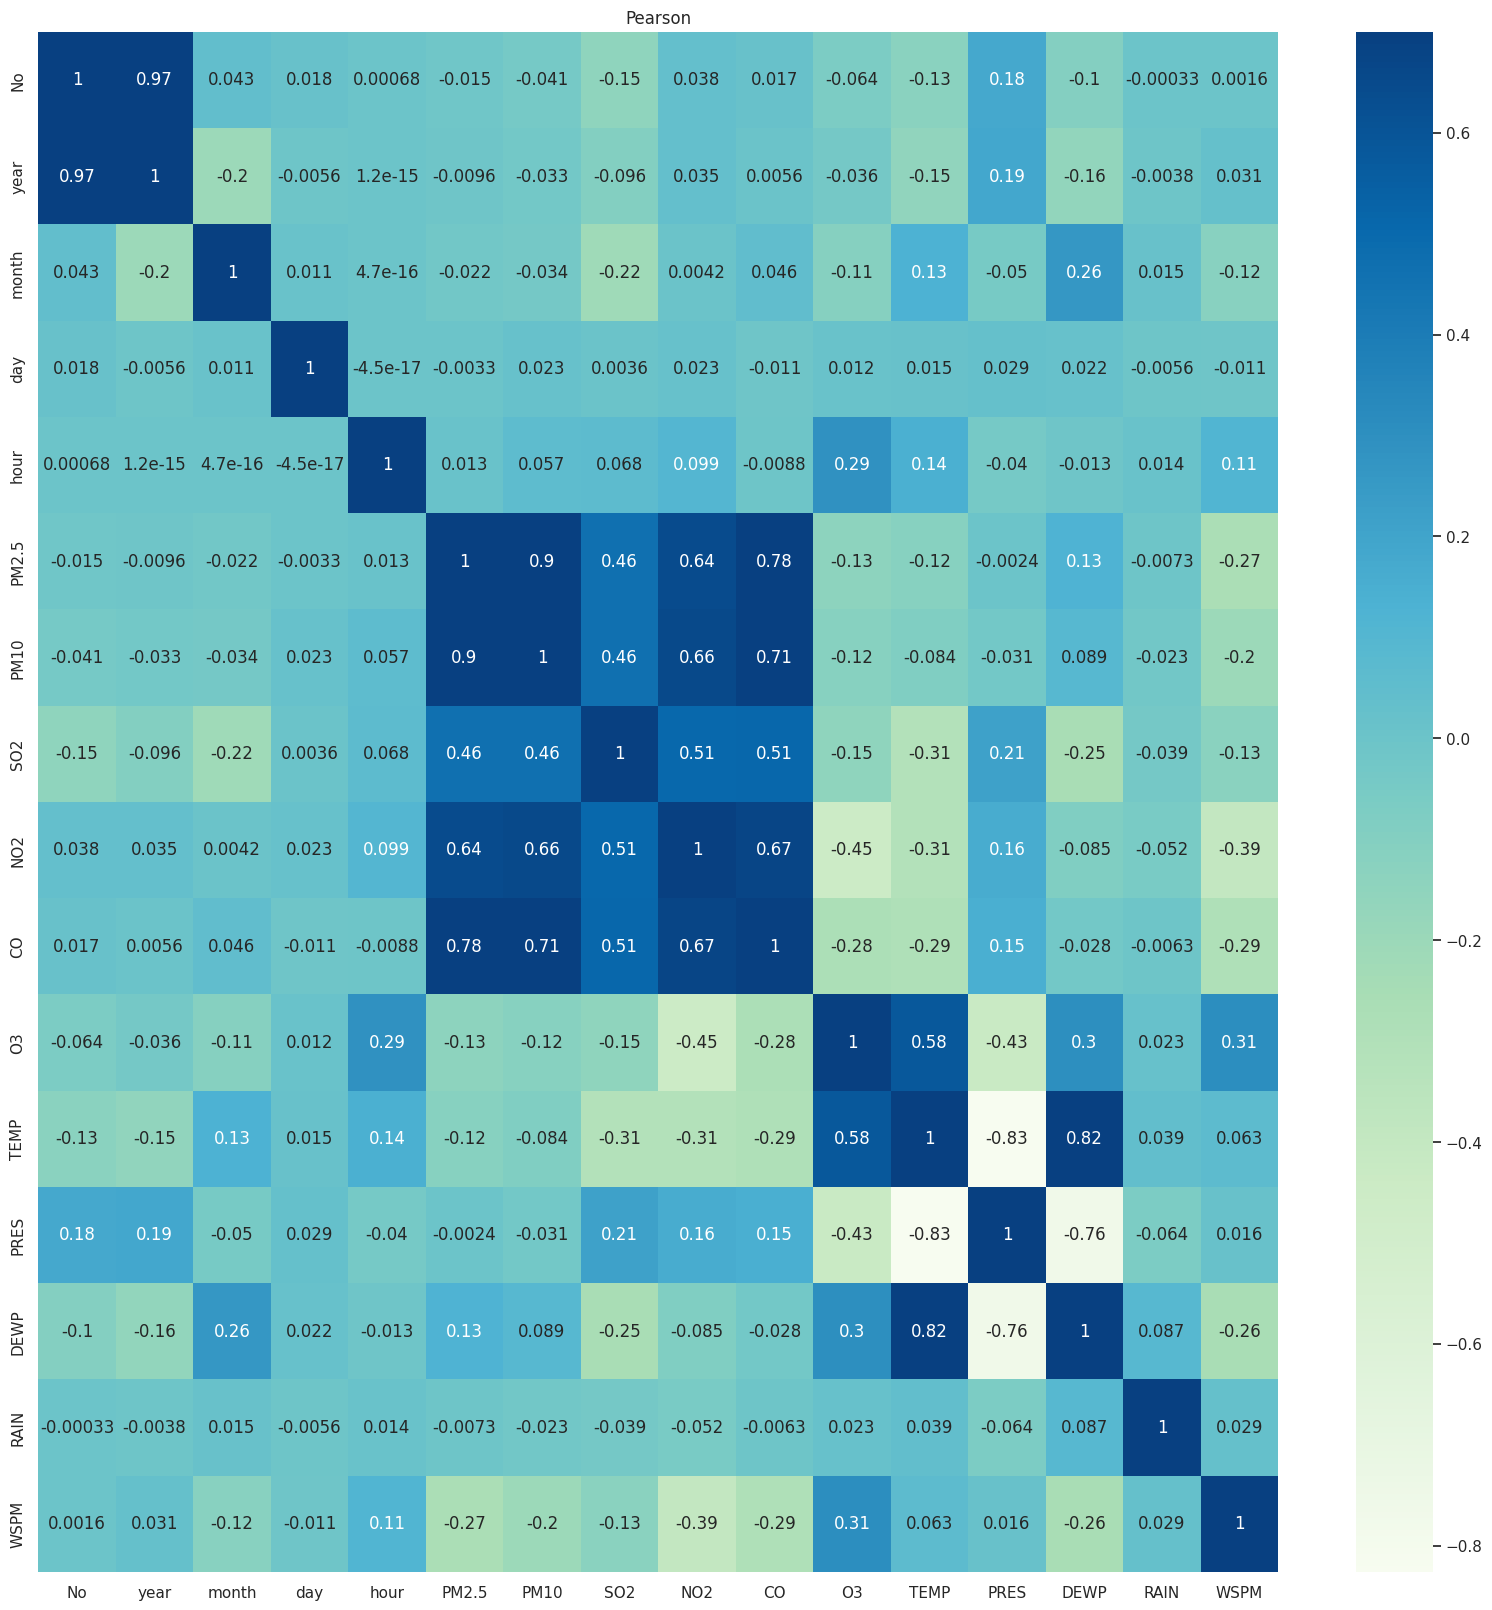

In [296]:
#Grafica de dispersion de Pearson
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(20,20))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

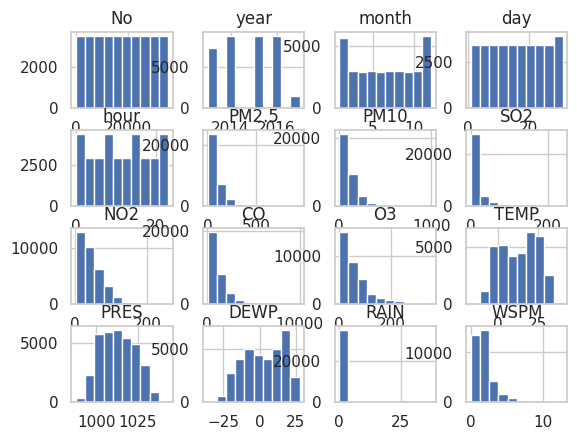

In [297]:
df.hist()

In [298]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

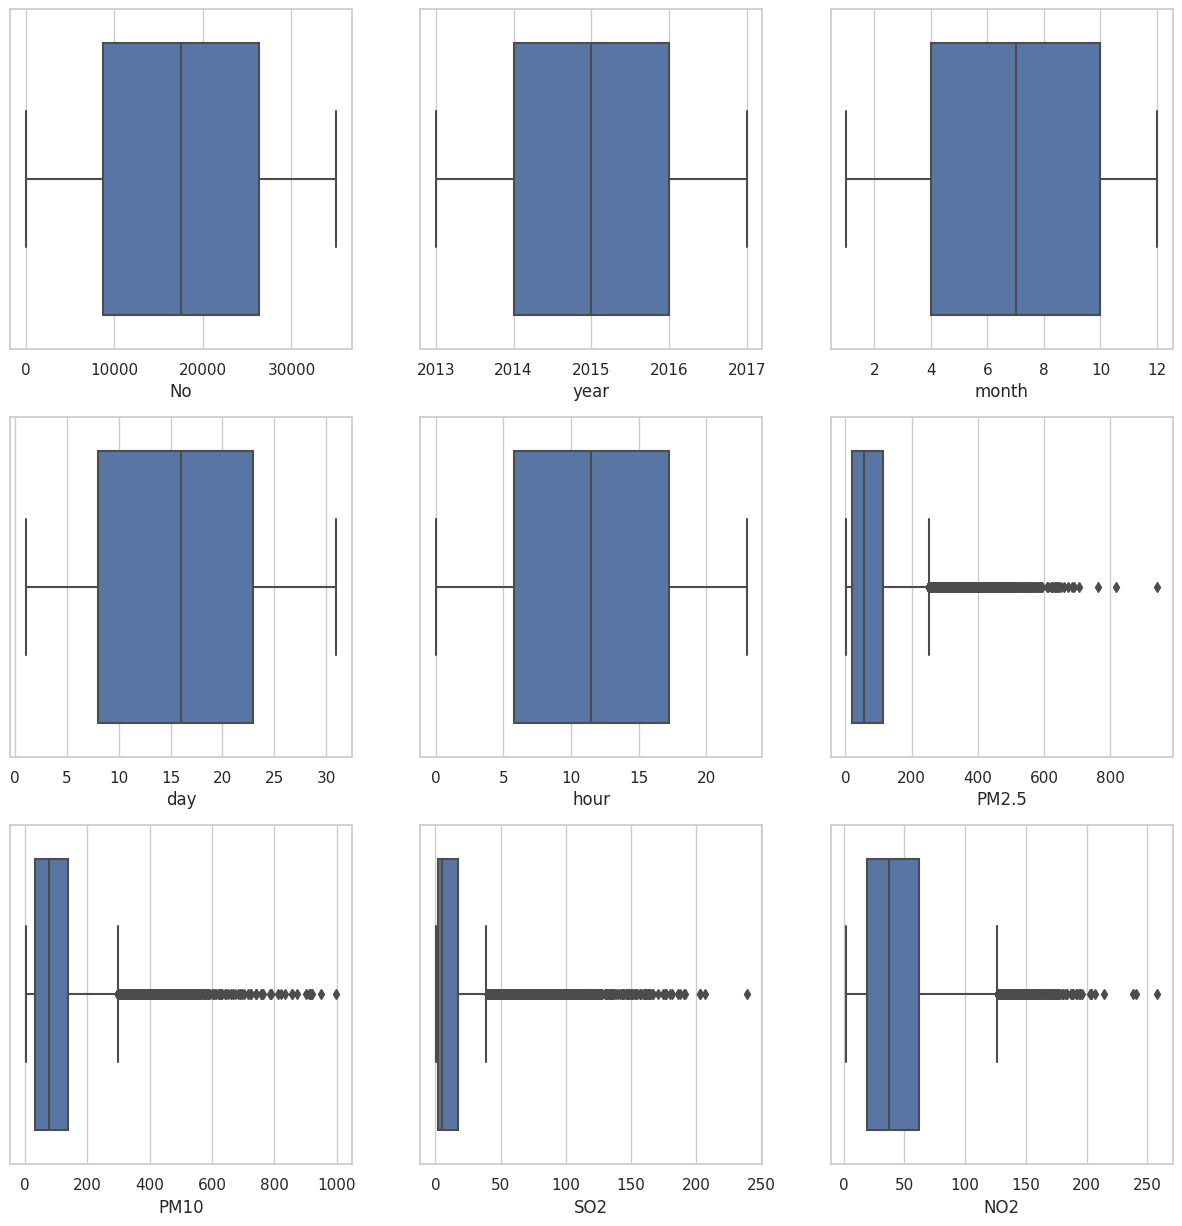

In [299]:
plt.figure(figsize=(15, 15))
# Excluir la última columna, asumiendo que es la columna de etiquetas
f = df.columns[:-1]
for i in enumerate(f[:9]):
# Seleccionar solo las primeras 9 características
    plt.subplot(3, 3, i[0] + 1)
    sns.boxplot(x=i[1], data=df)

In [300]:
# Convertir las columnas 'year', 'month', 'day' y 'hour' en una columna de tipo fecha y hora llamada 'Datetime'
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Eliminar las columnas 'No', 'year', 'month', 'day', 'hour' y 'station' que no son necesarias para el problema
df.drop(['No', 'year', 'month', 'day', 'hour', 'station'], axis=1, inplace=True)

# Mostrar las primeras filas del conjunto de datos resultante
df.head()

PM2.5  PM10  SO2  NO2     CO    O3  TEMP    PRES  DEWP  RAIN  wd  WSPM  \
0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9  1025.8 -20.5   0.0  NW   9.3   
1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1  1026.1 -21.3   0.0  NW   9.4   
2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7  1026.2 -23.0   0.0  NW   8.6   
3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1  1027.3 -23.3   0.0  NW   6.6   
4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4  1027.7 -22.9   0.0  NW   4.5   

             Datetime  
0 2013-03-01 00:00:00  
1 2013-03-01 01:00:00  
2 2013-03-01 02:00:00  
3 2013-03-01 03:00:00  
4 2013-03-01 04:00:00

In [301]:
df = df.fillna(df.mean())

<ipython-input-301-04e87d67d337>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
<ipython-input-301-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [302]:
# Establecer la columna 'Datetime' como índice del DataFrame
df_indexed = df.set_index(['Datetime'])

# Mostrar las primeras filas del conjunto de datos resultante con el índice cambiado
df_indexed.head()

PM2.5  PM10        SO2        NO2           CO  \
Datetime                                                              
2013-03-01 00:00:00    3.0   6.0   3.000000   8.000000   300.000000   
2013-03-01 01:00:00   12.0  12.0   3.000000   7.000000   300.000000   
2013-03-01 02:00:00   14.0  14.0  13.572039   7.000000   200.000000   
2013-03-01 03:00:00   12.0  12.0   3.000000   5.000000  1187.063979   
2013-03-01 04:00:00   12.0  12.0   3.000000  43.908865   200.000000   

                            O3  TEMP    PRES  DEWP  RAIN  wd  WSPM  
Datetime                                                            
2013-03-01 00:00:00  44.000000  -0.9  1025.8 -20.5   0.0  NW   9.3  
2013-03-01 01:00:00  47.000000  -1.1  1026.1 -21.3   0.0  NW   9.4  
2013-03-01 02:00:00  22.000000  -1.7  1026.2 -23.0   0.0  NW   8.6  
2013-03-01 03:00:00  55.201321  -2.1  1027.3 -23.3   0.0  NW   6.6  
2013-03-01 04:00:00  11.000000  -2.4  1027.7 -22.9   0.0  NW   4.5

In [303]:
df_indexed = df_indexed.fillna(method='bfill')

In [304]:
df_indexed.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       80.167173     88.444361     19.206951     30.387486   1119.883237   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       20.000000     32.000000      2.000000     20.000000    500.000000   
50%       57.000000     79.000000      5.140800     39.000000    900.000000   
75%      109.000000    137.000000     16.000000     61.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       53.695941     11.475233     10.169935     13.716048      0.761114   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       11.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       47.000000     14.400000   1012.800000      3.000000      0.000000   
75%       76.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35064.000000  
mean       1.807533  
std        1.287009  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

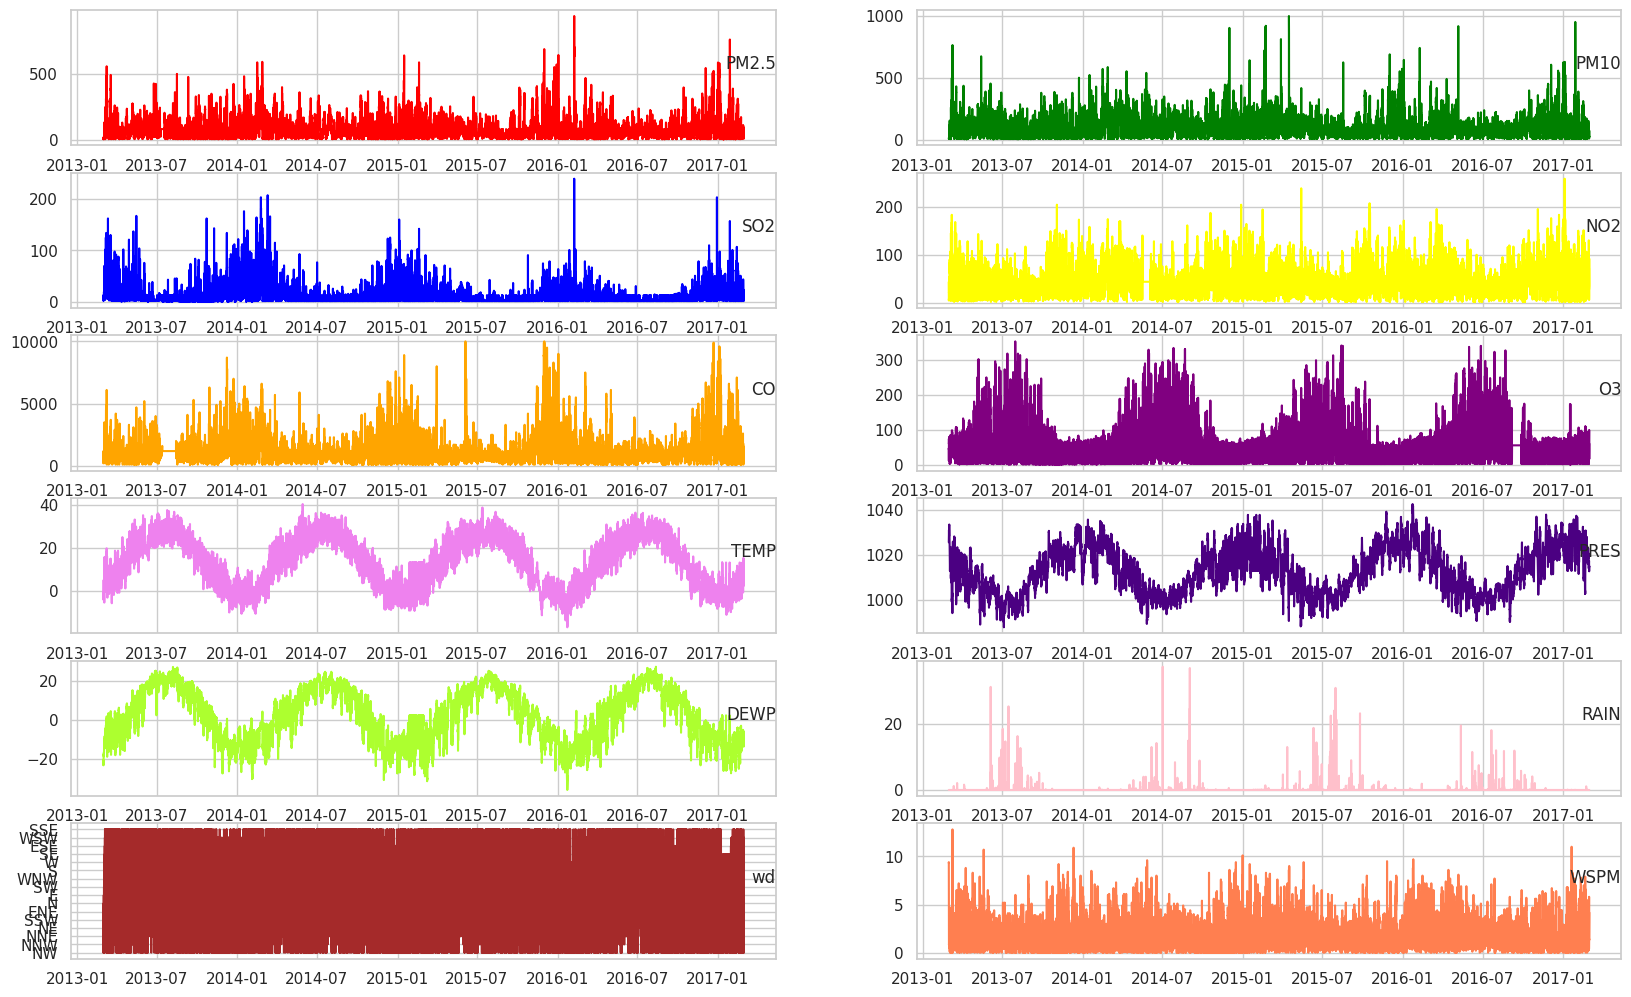

In [305]:
# Calcula el número de columnas (variables) presentes en el DataFrame df_indexed
no_cols = len(df_indexed.columns)
# Lista de colores utilizados para diferenciar las líneas en el gráfico
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'violet', 'indigo', 'greenyellow', 'pink', 'brown', 'coral']
# Índice para ubicar los subplots en el gráfico
index = 1
# Configura el tamaño del gráfico
plt.figure(figsize=(20, 25))
# Recorre cada columna en el DataFrame y crea un subplot para cada una
for column in df_indexed.columns:
    # Ubica el subplot en la posición adecuada del grid
    plt.subplot(no_cols, 2, index)
    # Grafica la serie de tiempo correspondiente a la columna actual, utilizando el color asignado
    plt.plot(df_indexed[column], color=colors[index-1])
    # Añade el título de la columna a la derecha del gráfico
    plt.title(column, loc='right', y=0.5)
    # Incrementa el índice para el próximo subplot
    index += 1
# Muestra el gráfico con los subplots
plt.show()



In [306]:
encoder = LabelEncoder()
# Aplica el codificador de etiquetas al atributo 'wd' del DataFrame df_indexed
df_indexed['wd'] = encoder.fit_transform(df_indexed['wd'])
# Muestra las primeras filas del DataFrame df_indexed después de aplicar la transformación
df_indexed.head()

PM2.5  PM10        SO2        NO2           CO  \
Datetime                                                              
2013-03-01 00:00:00    3.0   6.0   3.000000   8.000000   300.000000   
2013-03-01 01:00:00   12.0  12.0   3.000000   7.000000   300.000000   
2013-03-01 02:00:00   14.0  14.0  13.572039   7.000000   200.000000   
2013-03-01 03:00:00   12.0  12.0   3.000000   5.000000  1187.063979   
2013-03-01 04:00:00   12.0  12.0   3.000000  43.908865   200.000000   

                            O3  TEMP    PRES  DEWP  RAIN  wd  WSPM  
Datetime                                                            
2013-03-01 00:00:00  44.000000  -0.9  1025.8 -20.5   0.0   7   9.3  
2013-03-01 01:00:00  47.000000  -1.1  1026.1 -21.3   0.0   7   9.4  
2013-03-01 02:00:00  22.000000  -1.7  1026.2 -23.0   0.0   7   8.6  
2013-03-01 03:00:00  55.201321  -2.1  1027.3 -23.3   0.0   7   6.6  
2013-03-01 04:00:00  11.000000  -2.4  1027.7 -22.9   0.0   7   4.5

In [307]:
df_indexed = df_indexed.resample(rule='D').mean()
df_indexed.head()

PM2.5        PM10        SO2        NO2           CO  \
Datetime                                                                
2013-03-01    8.083333    9.333333   3.440502  14.287869   386.960999   
2013-03-02   32.625000   40.655709  20.208333  47.583333   920.833333   
2013-03-03   76.500000   95.208333  30.875000  65.291667  1749.916667   
2013-03-04   19.833333   35.780709  13.083333  43.291667   791.583333   
2013-03-05  114.958333  145.833333  56.940502  86.037869  1824.252666   

                   O3      TEMP         PRES       DEWP  RAIN        wd  \
Datetime                                                                  
2013-03-01  62.175055  0.541667  1029.641667 -20.637500   0.0  5.125000   
2013-03-02  40.416667  0.083333  1029.466667 -16.275000   0.0  4.291667   
2013-03-03  24.541667  5.029167  1017.037500 -11.779167   0.0  6.375000   
2013-03-04  55.125000  8.937500  1020.116667 -12.437500   0.0  7.750000   
2013-03-05  74.541667  6.450000  1013.487500  -7.220833   0.0  4.708333   

                WSPM  
Datetime              
2013-03-01  3.166667  
2013-03-02  1.345833  
2013-03-03  1.625000  
2013-03-04  2.091667  
2013-03-05  1.195833

In [308]:
df.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       80.167173     88.444361     19.206951     30.387486   1119.883237   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       20.000000     32.000000      2.000000     20.000000    500.000000   
50%       57.000000     79.000000      5.140800     39.000000    900.000000   
75%      109.000000    137.000000     16.000000     61.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       53.695941     11.475233     10.169935     13.716048      0.761114   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       11.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       47.000000     14.400000   1012.800000      3.000000      0.000000   
75%       76.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35064.000000  
mean       1.807533  
std        1.287009  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

## Escalar datos al intervalo [0,1]

In [309]:
scaler = MinMaxScaler()
# Aplica el escalador MinMaxScaler al DataFrame df_indexed
# La función fit_transform() encuentra los valores mínimos y máximos de cada columna y realiza la transformación
# para que los valores estén en el rango [0, 1].
df_Transformed = scaler.fit_transform(df_indexed)
# Imprime el DataFrame df_Transformed con los datos transformados
print(df_Transformed)

[[0.00726768 0.00849118 0.0151749  ... 0.         0.25746269 0.50237718]
 [0.05536502 0.06986749 0.12312232 ... 0.         0.18283582 0.15610143]
 [0.14135228 0.17676355 0.19179185 ... 0.         0.36940299 0.20919176]
 ...
 [0.04646415 0.07201176 0.07376609 ... 0.         0.4141791  0.16323296]
 [0.13514617 0.16410843 0.12419528 ... 0.         0.43283582 0.20998415]
 [0.03201045 0.04604833 0.03889485 ... 0.         0.41791045 0.28526149]]


# Crear datos de entrenamiento para modelos
## Conjunto de datos dividido: entrenar (70%), validar (20%), probar (10%)

In [310]:
# Obtiene la longitud del DataFrame df_Transformed
n = len(df_Transformed)
# Divide el DataFrame en conjuntos de entrenamiento, validación y prueba utilizando divisiones porcentuales
# El conjunto de entrenamiento contiene el 70% de los datos
train = df_Transformed[0:int(n*0.7)]
# El conjunto de validación contiene el 20% de los datos (desde el 70% hasta el 90%)
validate = df_Transformed[int(n*0.7):int(n*0.9)]
# El conjunto de prueba contiene el 10% de los datos (desde el 90% hasta el final)
test = df_Transformed[int(n*0.9):]
# Imprime el tamaño (número de filas) de cada conjunto de datos
print(train.shape, validate.shape, test.shape)


(1022, 12) (292, 12) (147, 12)


## Dividir datos de fecha y hora (índice) correspondientes a conjuntos de datos

In [311]:
# Obtiene la longitud del DataFrame df_indexed
n = len(df_indexed)
# Divide las fechas del DataFrame en conjuntos de entrenamiento, validación y prueba utilizando divisiones porcentuales
# El conjunto de entrenamiento contiene el 70% de las fechas
train_dates = df_indexed.index[0:int(n*0.7)]
# El conjunto de validación contiene el 20% de las fechas (desde el 70% hasta el 90%)
validate_dates = df_indexed.index[int(n*0.7):int(n*0.9)]
# El conjunto de prueba contiene el 10% de las fechas (desde el 90% hasta el final)
test_dates = df_indexed.index[int(n*0.9):]
# Imprime el tamaño (número de fechas) de cada conjunto de datos
print(train_dates.shape, validate_dates.shape, test_dates.shape)


(1022,) (292,) (147,)


## Crear celdas de datos para datos de entrenamiento

In [312]:
#ook_back
n_input = 7
# Número de características en los datos (número de columnas en el DataFrame df_Transformed)
n_features = len(df_Transformed[1])
# Generación de secuencias de entrenamiento utilizando TimeseriesGenerator
# TimeseriesGenerator toma los datos de entrenamiento 'train' y los divide en secuencias de longitud 'n_input'.
# 'batch_size=1' indica que cada secuencia de entrada se usará para entrenar el modelo en un solo paso.
generatorTrain = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
# Generación de secuencias de validación utilizando TimeseriesGenerator
# Se hace lo mismo que con generatorTrain, pero utilizando los datos de validación 'validate'.
generatorValidate = TimeseriesGenerator(validate, validate, length=n_input, batch_size=1)
# Generación de secuencias de prueba utilizando TimeseriesGenerator
# Se hace lo mismo que con generatorTrain y generatorValidate, pero utilizando los datos de prueba 'test'.
generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)


In [313]:
x_train = np.array([x.reshape((n_input,n_features)) for x,y in generatorTrain])
y_train = np.array([y.flatten() for x,y in generatorTrain])
x_pred = np.array([x.reshape((n_input,n_features)) for x,y in generatorValidate])
y_pred = np.array([y.flatten() for x,y in generatorValidate])
x_test = np.array([x.reshape((n_input,n_features)) for x,y in generatorTest])
y_test = np.array([y.flatten() for x,y in generatorTest])

#Crear funciones para dibujar gráficos
##La función plot Error_Rate() : traza la tasa de error

In [314]:
def plot_Error_Rate(history):
    # Configura el tamaño y la disposición de la figura para la visualización
    plt.figure(figsize=(20, 13))
    # Gráfico para la función de pérdida (loss)
    plt.subplot(3, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')  # Grafica la pérdida en el conjunto de entrenamiento
    plt.plot(history.history['val_loss'], label='Validation loss')  # Grafica la pérdida en el conjunto de validación
    plt.legend()  # Agrega una leyenda para distinguir entre las curvas
    # Gráfico para la raíz del error cuadrático medio (root_mean_squared_error)
    plt.subplot(3, 2, 2)
    plt.plot(history.history['root_mean_squared_error'], label='Training root mean square error')  # Grafica el RMSE en el conjunto de entrenamiento
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation root mean square error')  # Grafica el RMSE en el conjunto de validación
    plt.legend()  # Agrega una leyenda
    # Gráfico para la precisión (accuracy)
    plt.subplot(3, 2, 3)
    plt.plot(history.history['accuracy'], label='Training accuracy')  # Grafica la precisión en el conjunto de entrenamiento
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')  # Grafica la precisión en el conjunto de validación
    plt.legend()  # Agrega una leyenda
    # Muestra los gráficos
    plt.show()

## Traza los valores reales y predichos para evaluar el Modelo

In [315]:
def plot_Actual_Predict(data_predict, actual, dates, model, name_title = df_indexed.columns):
    # Realiza las predicciones utilizando el modelo proporcionado
    pred = model.predict(data_predict)
    # Invierte la transformación realizada previamente por el escalador MinMaxScaler
    # para obtener las predicciones y los valores reales en la escala original
    pred = scaler.inverse_transform(pred)
    actual = scaler.inverse_transform(actual)
    # Crea dos DataFrames para almacenar las predicciones y los valores reales
    pred_df = pd.DataFrame(pred, columns=[column for column in name_title], index=dates)
    actual_df = pd.DataFrame(actual, columns=[column for column in name_title], index=dates)
    # Configura la visualización para comparar las predicciones con los valores reales
    index = 1
    plt.figure(figsize=(30, 60))
    for i in name_title:
        plt.subplot(len(name_title), 2, index)
        plt.title(i)
        plt.plot(actual_df[i], label='actual')  # Grafica los valores reales
        plt.plot(pred_df[i], label='predict')  # Grafica las predicciones
        plt.legend()
        index += 1
    plt.show()


##Traza el pronóstico mostrando el futuro




In [316]:
def plot_Forecasting(n_future, n_past, data_predict, actual, dates, model, name_title = df_indexed.columns):
    # Lista para almacenar las predicciones futuras
    predicts = []
    # Preparar el lote actual con la última secuencia conocida y el último valor real
    current_batch = np.array([np.concatenate((data_predict[-1][1:], [actual[-1]]), axis=0)])
    # Generar 'n_future' predicciones futuras
    for i in range(n_future):
        # Obtener el valor predicho para el primer lote del futuro
        current_pred = model.predict(current_batch)[0]
        predicts.append(current_pred)  # Agregar el valor predicho a la lista de predicciones
        # Eliminar el primer valor de la secuencia actual y agregar la nueva predicción
        current_batch_rmv_first = current_batch[:, 1:, :]
        current_batch = np.append(current_batch_rmv_first, [[current_pred]], axis=1)
    # Concatenar los valores pasados y futuros para obtener la predicción completa
    past = actual[-n_past:]
    future = np.concatenate((past, np.array(predicts)), axis=0)
    # Aplicar la transformación inversa para obtener los valores originales
    future = scaler.inverse_transform(future)
    past = scaler.inverse_transform(past)
    # Obtener las fechas correspondientes a los valores pasados y futuros
    past_dates = dates[-n_past:]
    future_dates = pd.date_range(list(dates)[-n_past], periods=(n_future + n_past), freq='D').tolist()
    # Crear DataFrames para visualizar los datos pasados y futuros
    future_df = pd.DataFrame(future, columns=[column for column in name_title], index=future_dates)
    past_df = pd.DataFrame(past, columns=[column for column in name_title], index=past_dates)
    # Visualizar los datos pasados y futuros
    index = 1
    plt.figure(figsize=(30, 60))
    for i in name_title:
        plt.subplot(len(name_title), 2, index)
        plt.title(i)
        plt.plot(future_df[i], label='future')  # Graficar los datos futuros
        plt.plot(past_df[i], label='past')  # Graficar los datos pasados
        plt.legend()
        index += 1
    plt.show()


#Construiccion de modelos
## Modelo: red neuronal recurrente (RNN)

In [318]:
# Se crea un modelo secuencial de redes neuronales recurrentes (RNN) utilizando la biblioteca Keras
model1 = Sequential()
# Se agrega una capa LSTM con 100 unidades de memoria y función de activación 'relu'
# El input_shape debe corresponder a la longitud de la secuencia (n_input) y el número de características (n_features)
model1.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# Se agrega una capa densa (fully-connected) con el mismo número de características para la salida
model1.add(Dense(n_features))
# Se agrega una capa de dropout para prevenir el sobreajuste, con una tasa de 0.2 (20% de las neuronas se desactivan aleatoriamente durante el entrenamiento)
model1.add(Dropout(0.2))
# Se compila el modelo utilizando el optimizador 'adam' para el descenso de gradiente,
# la pérdida se mide utilizando el error cuadrático medio ('mse') y se incluyen métricas adicionales como precisión y error cuadrático medio.
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy', RootMeanSquaredError()])
# Se muestra un resumen del modelo, incluyendo el tipo de capa, el número de parámetros entrenables y el tamaño de salida de cada capa.
model1.summary()
# Se entrena el modelo utilizando los datos generados por los generadores de series temporales.
# El modelo se entrena durante 15 épocas, utilizando datos de validación para evaluar su rendimiento en cada época.
history1 = model1.fit(generatorTrain, validation_data=generatorValidate, epochs=19)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               45200     
                                                                 
 dense_9 (Dense)             (None, 12)                1212      
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                                                 
Total params: 46,412
Trainable params: 46,412
Non-trainable params: 0
_________________________________________________________________
Epoch 1/19
1015/1015 [==============================] - 9s 6ms/step - loss: 0.0426 - accuracy: 0.4946 - root_mean_squared_error: 0.2063 - val_loss: 0.0176 - val_accuracy: 0.5825 - val_root_mean_squared_error: 0.1327
Epoch 2/19
1015/1015 [==============================] - 7s 6ms/step - loss: 0.0385 - accuracy: 0.5

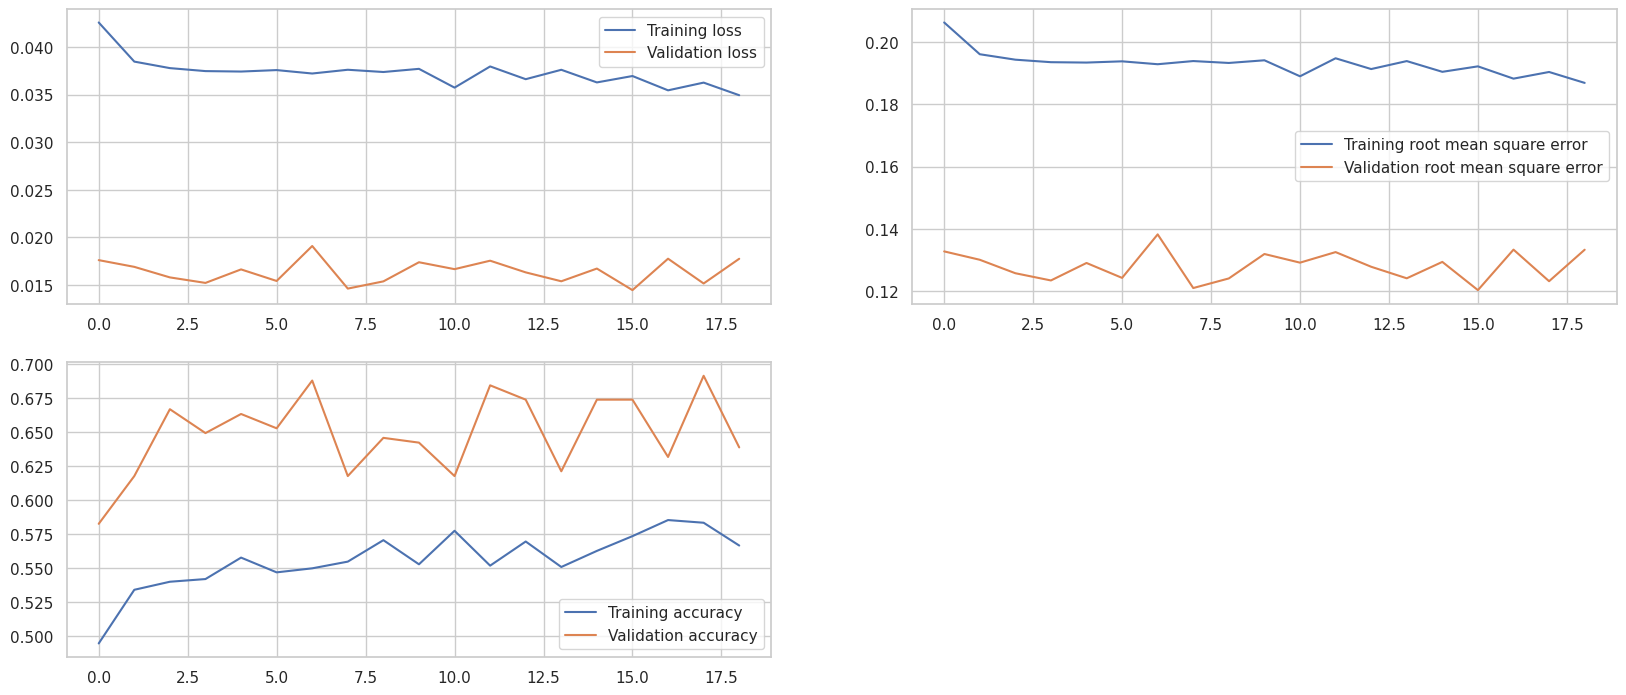

In [319]:
# Gráfico de la tasa de error del modelo 1
plot_Error_Rate(history1)

32/32 [==============================] - 0s 4ms/step


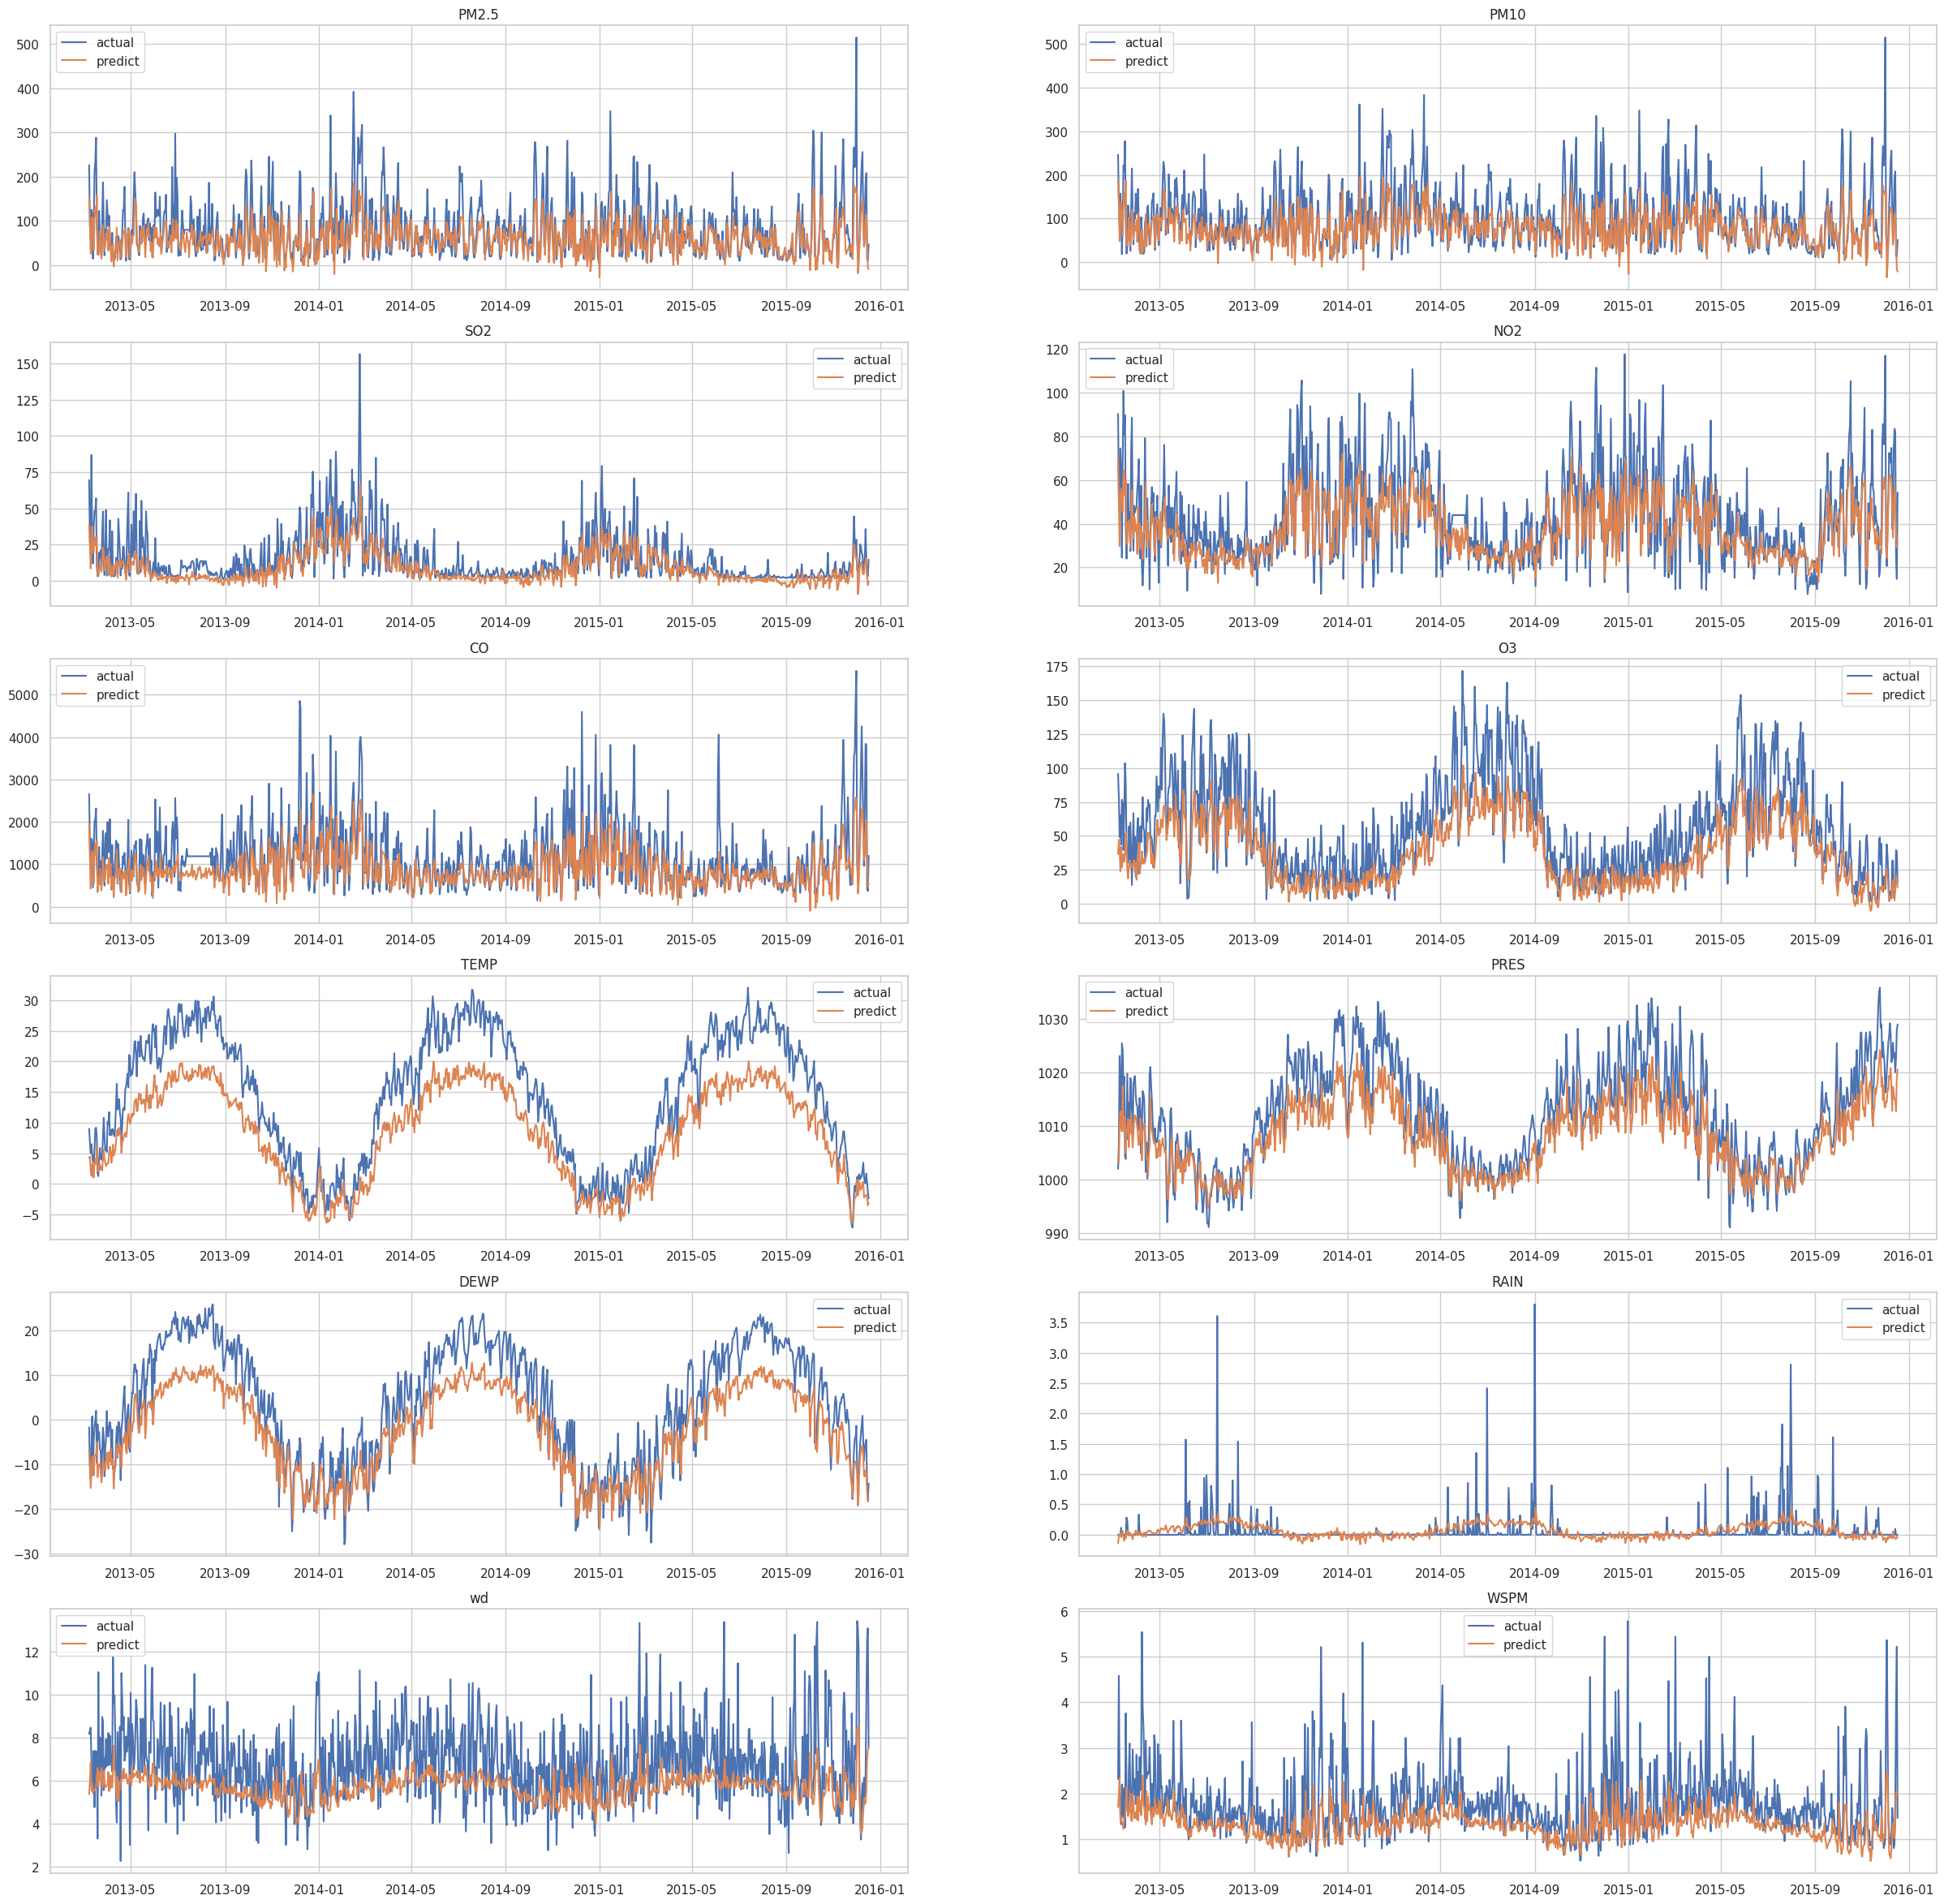

In [320]:
#Evaluación del modelo en Train
plot_Actual_Predict(x_train, y_train, train_dates[n_input:], model1)

9/9 [==============================] - 0s 3ms/step


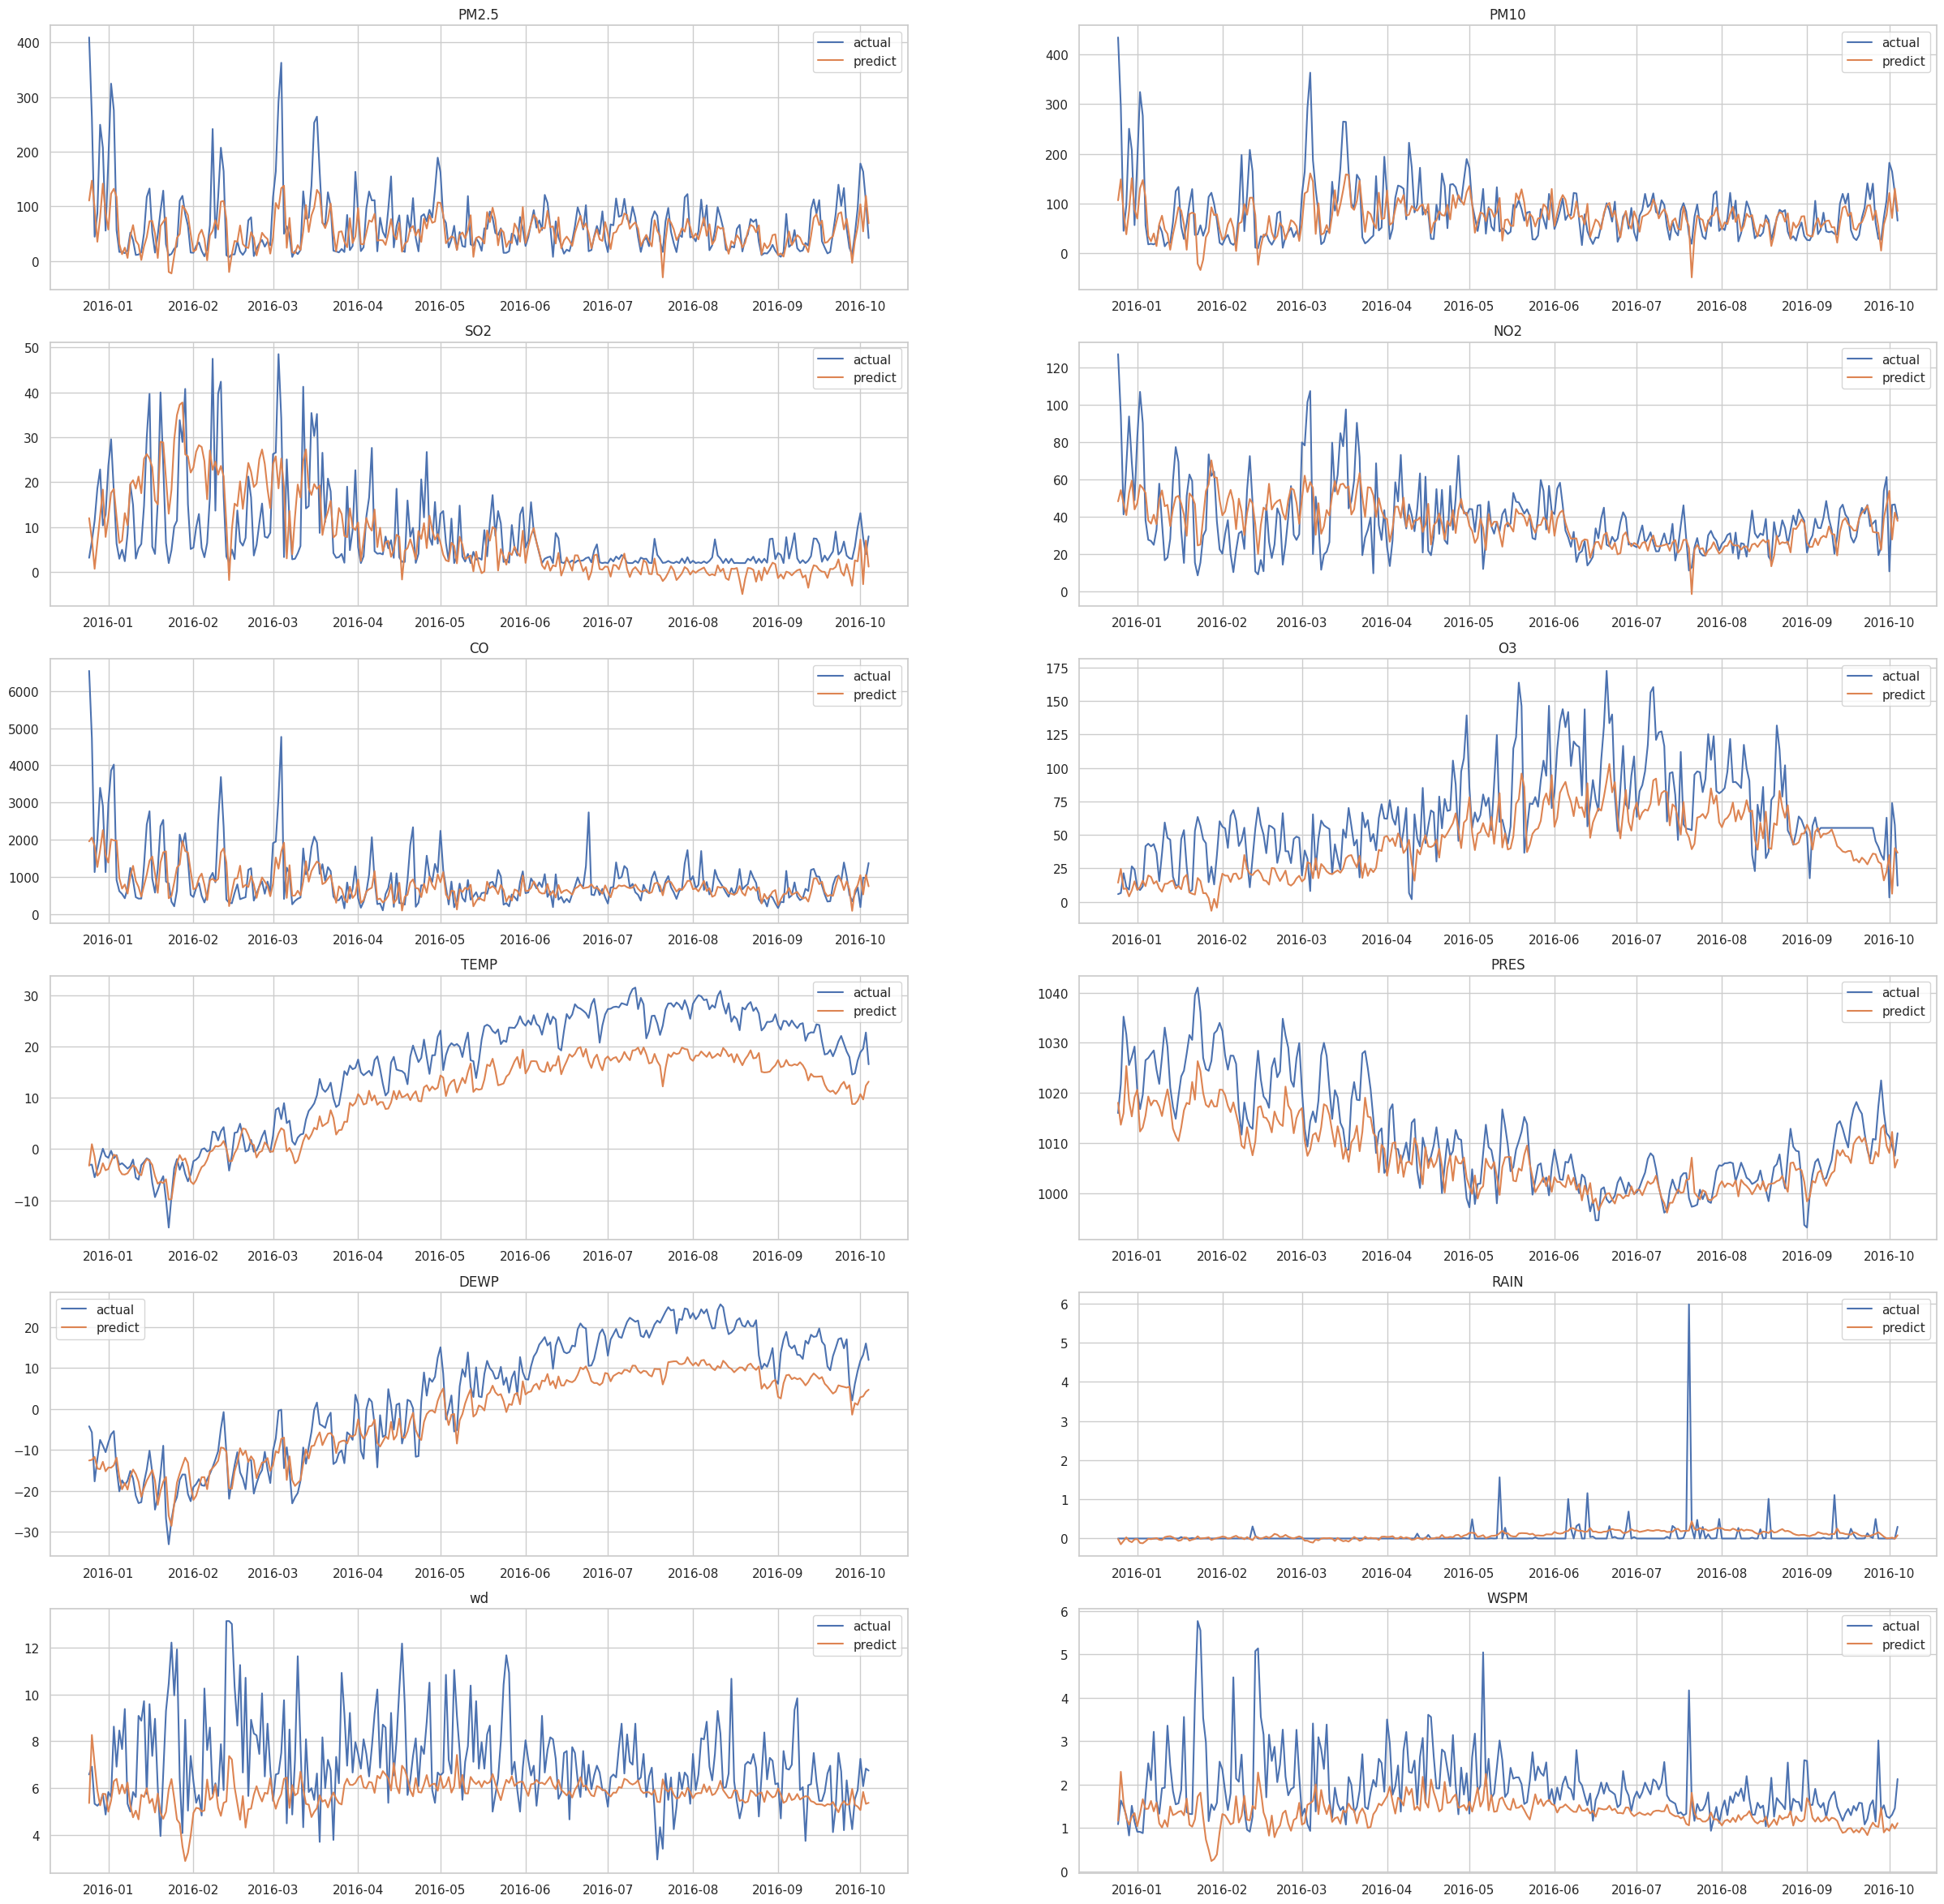

In [321]:
#Evaluación del modelo en el conjunto de validación
plot_Actual_Predict(x_pred, y_pred, validate_dates[n_input:], model1)


5/5 [==============================] - 0s 6ms/step


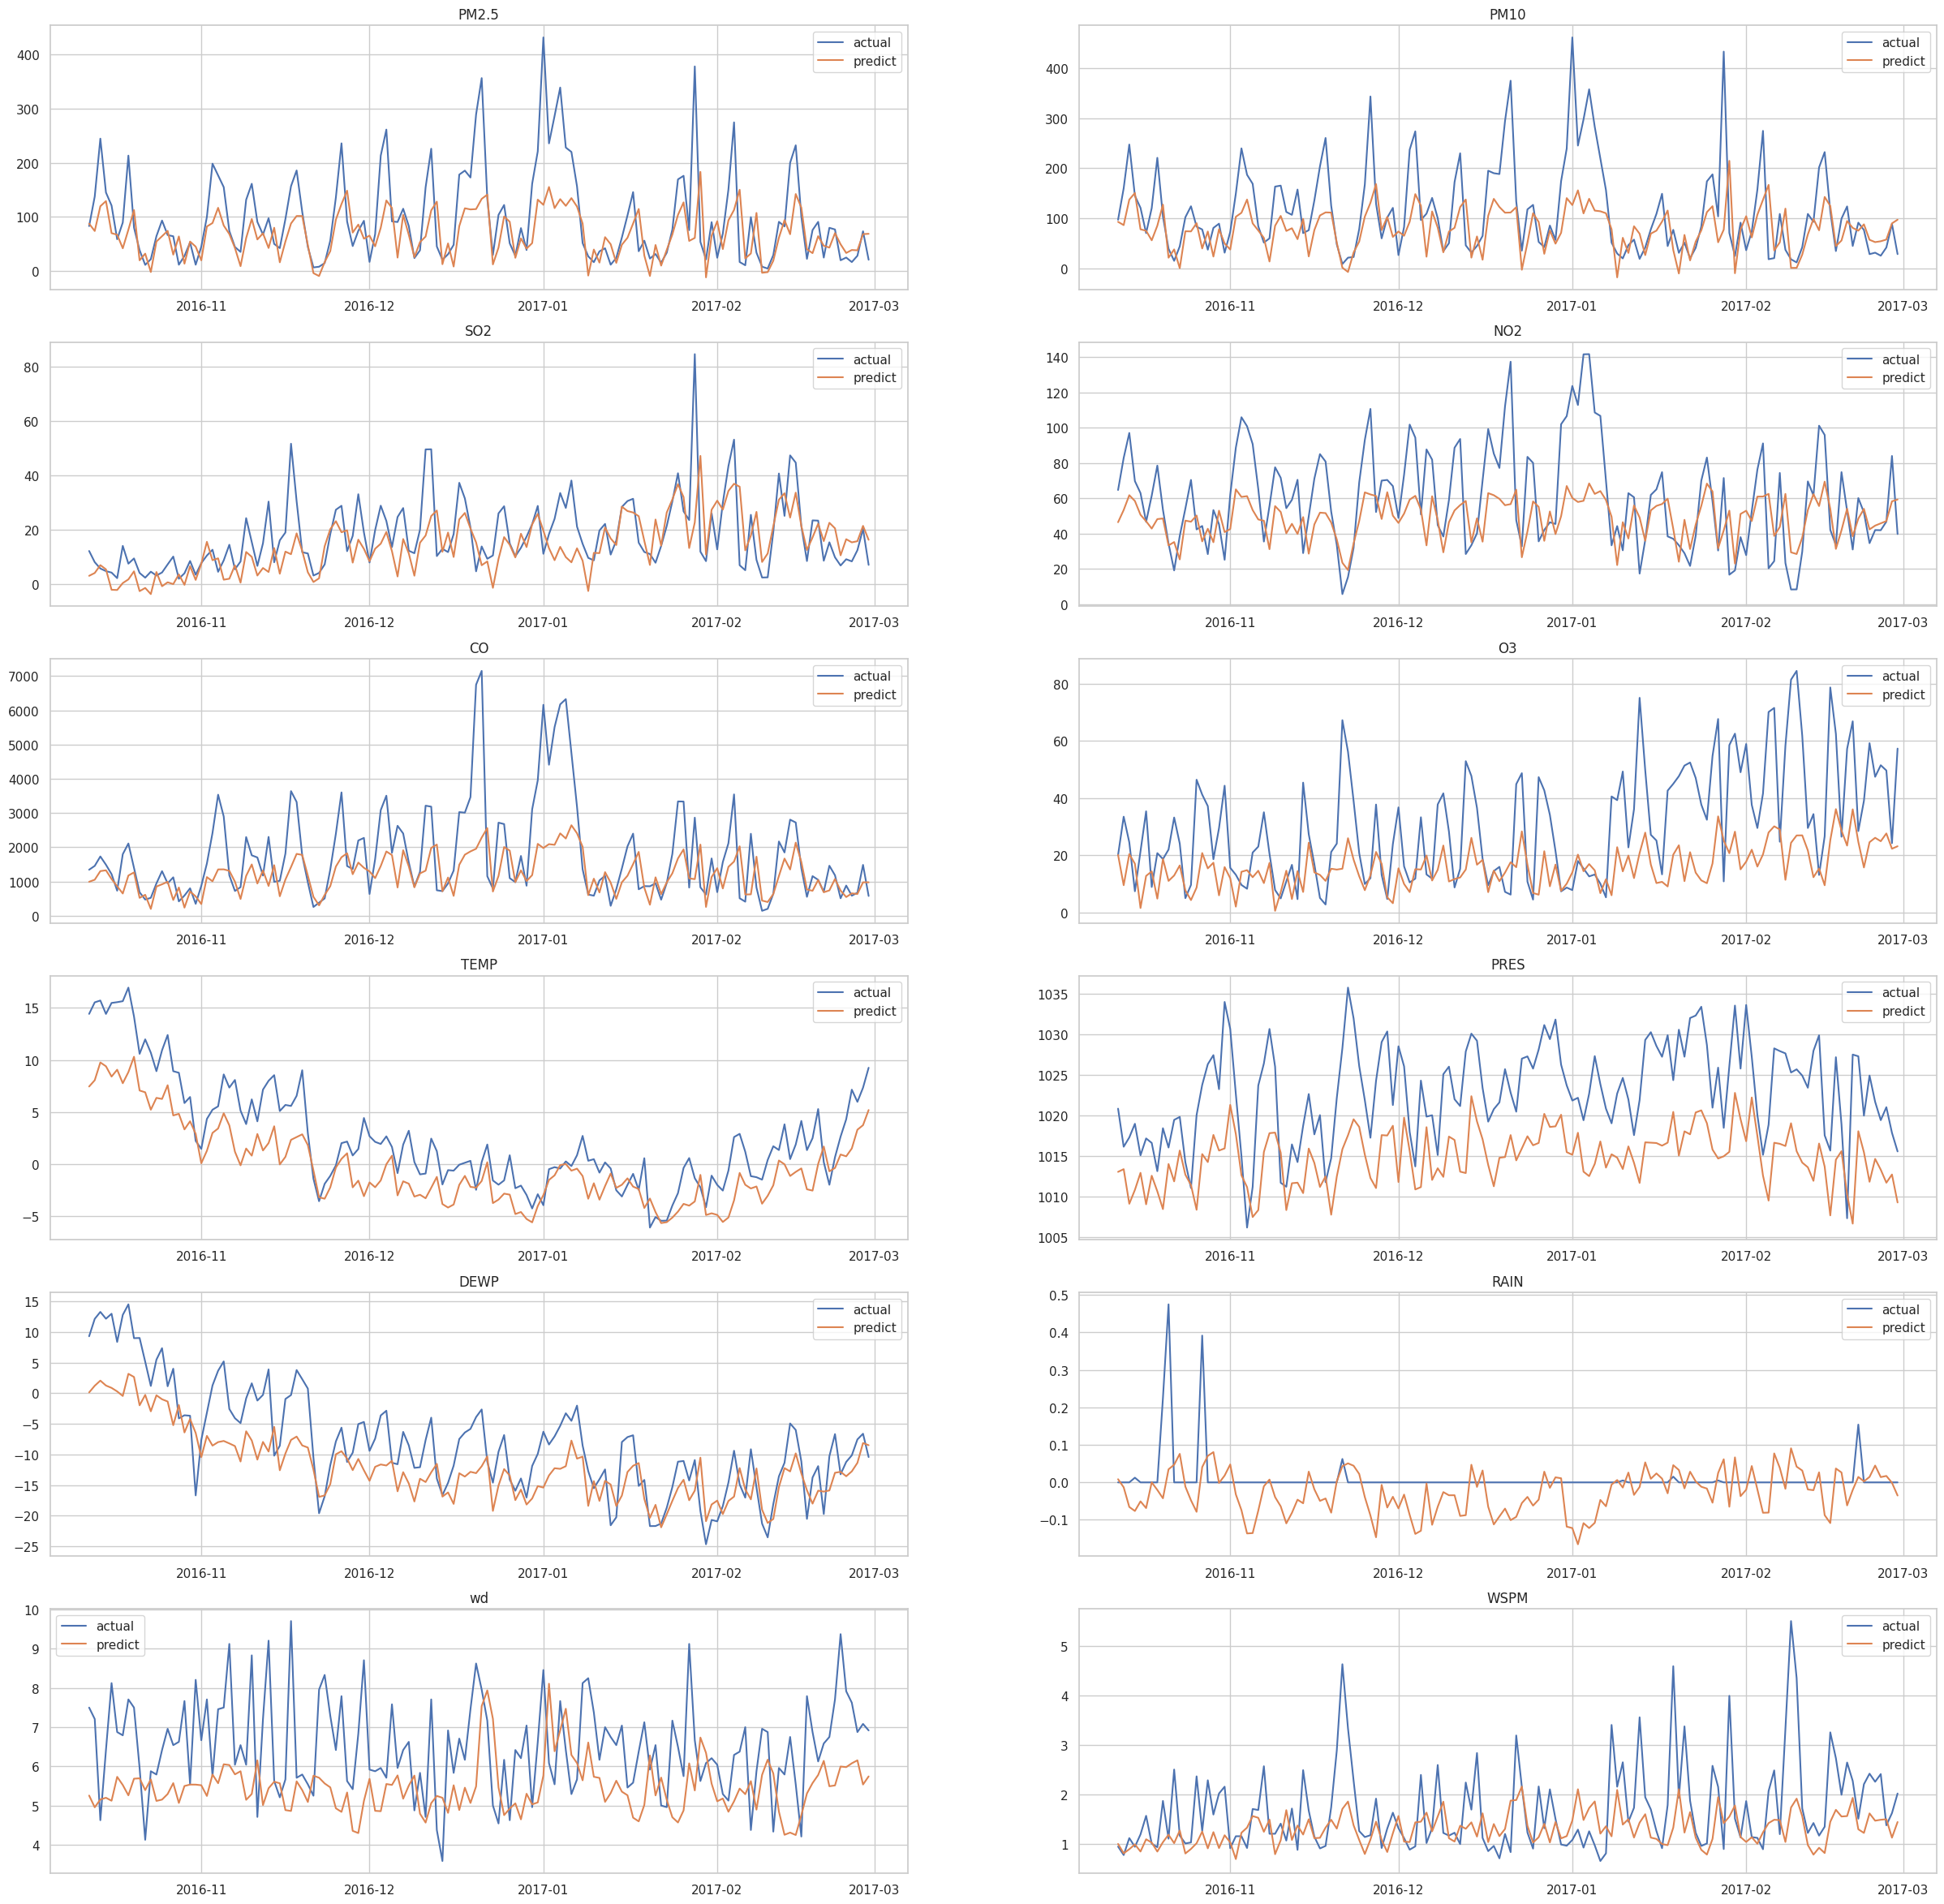

In [322]:
#Modelo en el conjunto de prueba
plot_Actual_Predict(x_test, y_test, test_dates[n_input:] ,model1)

1/1 [==============================] - 0s 25ms/step


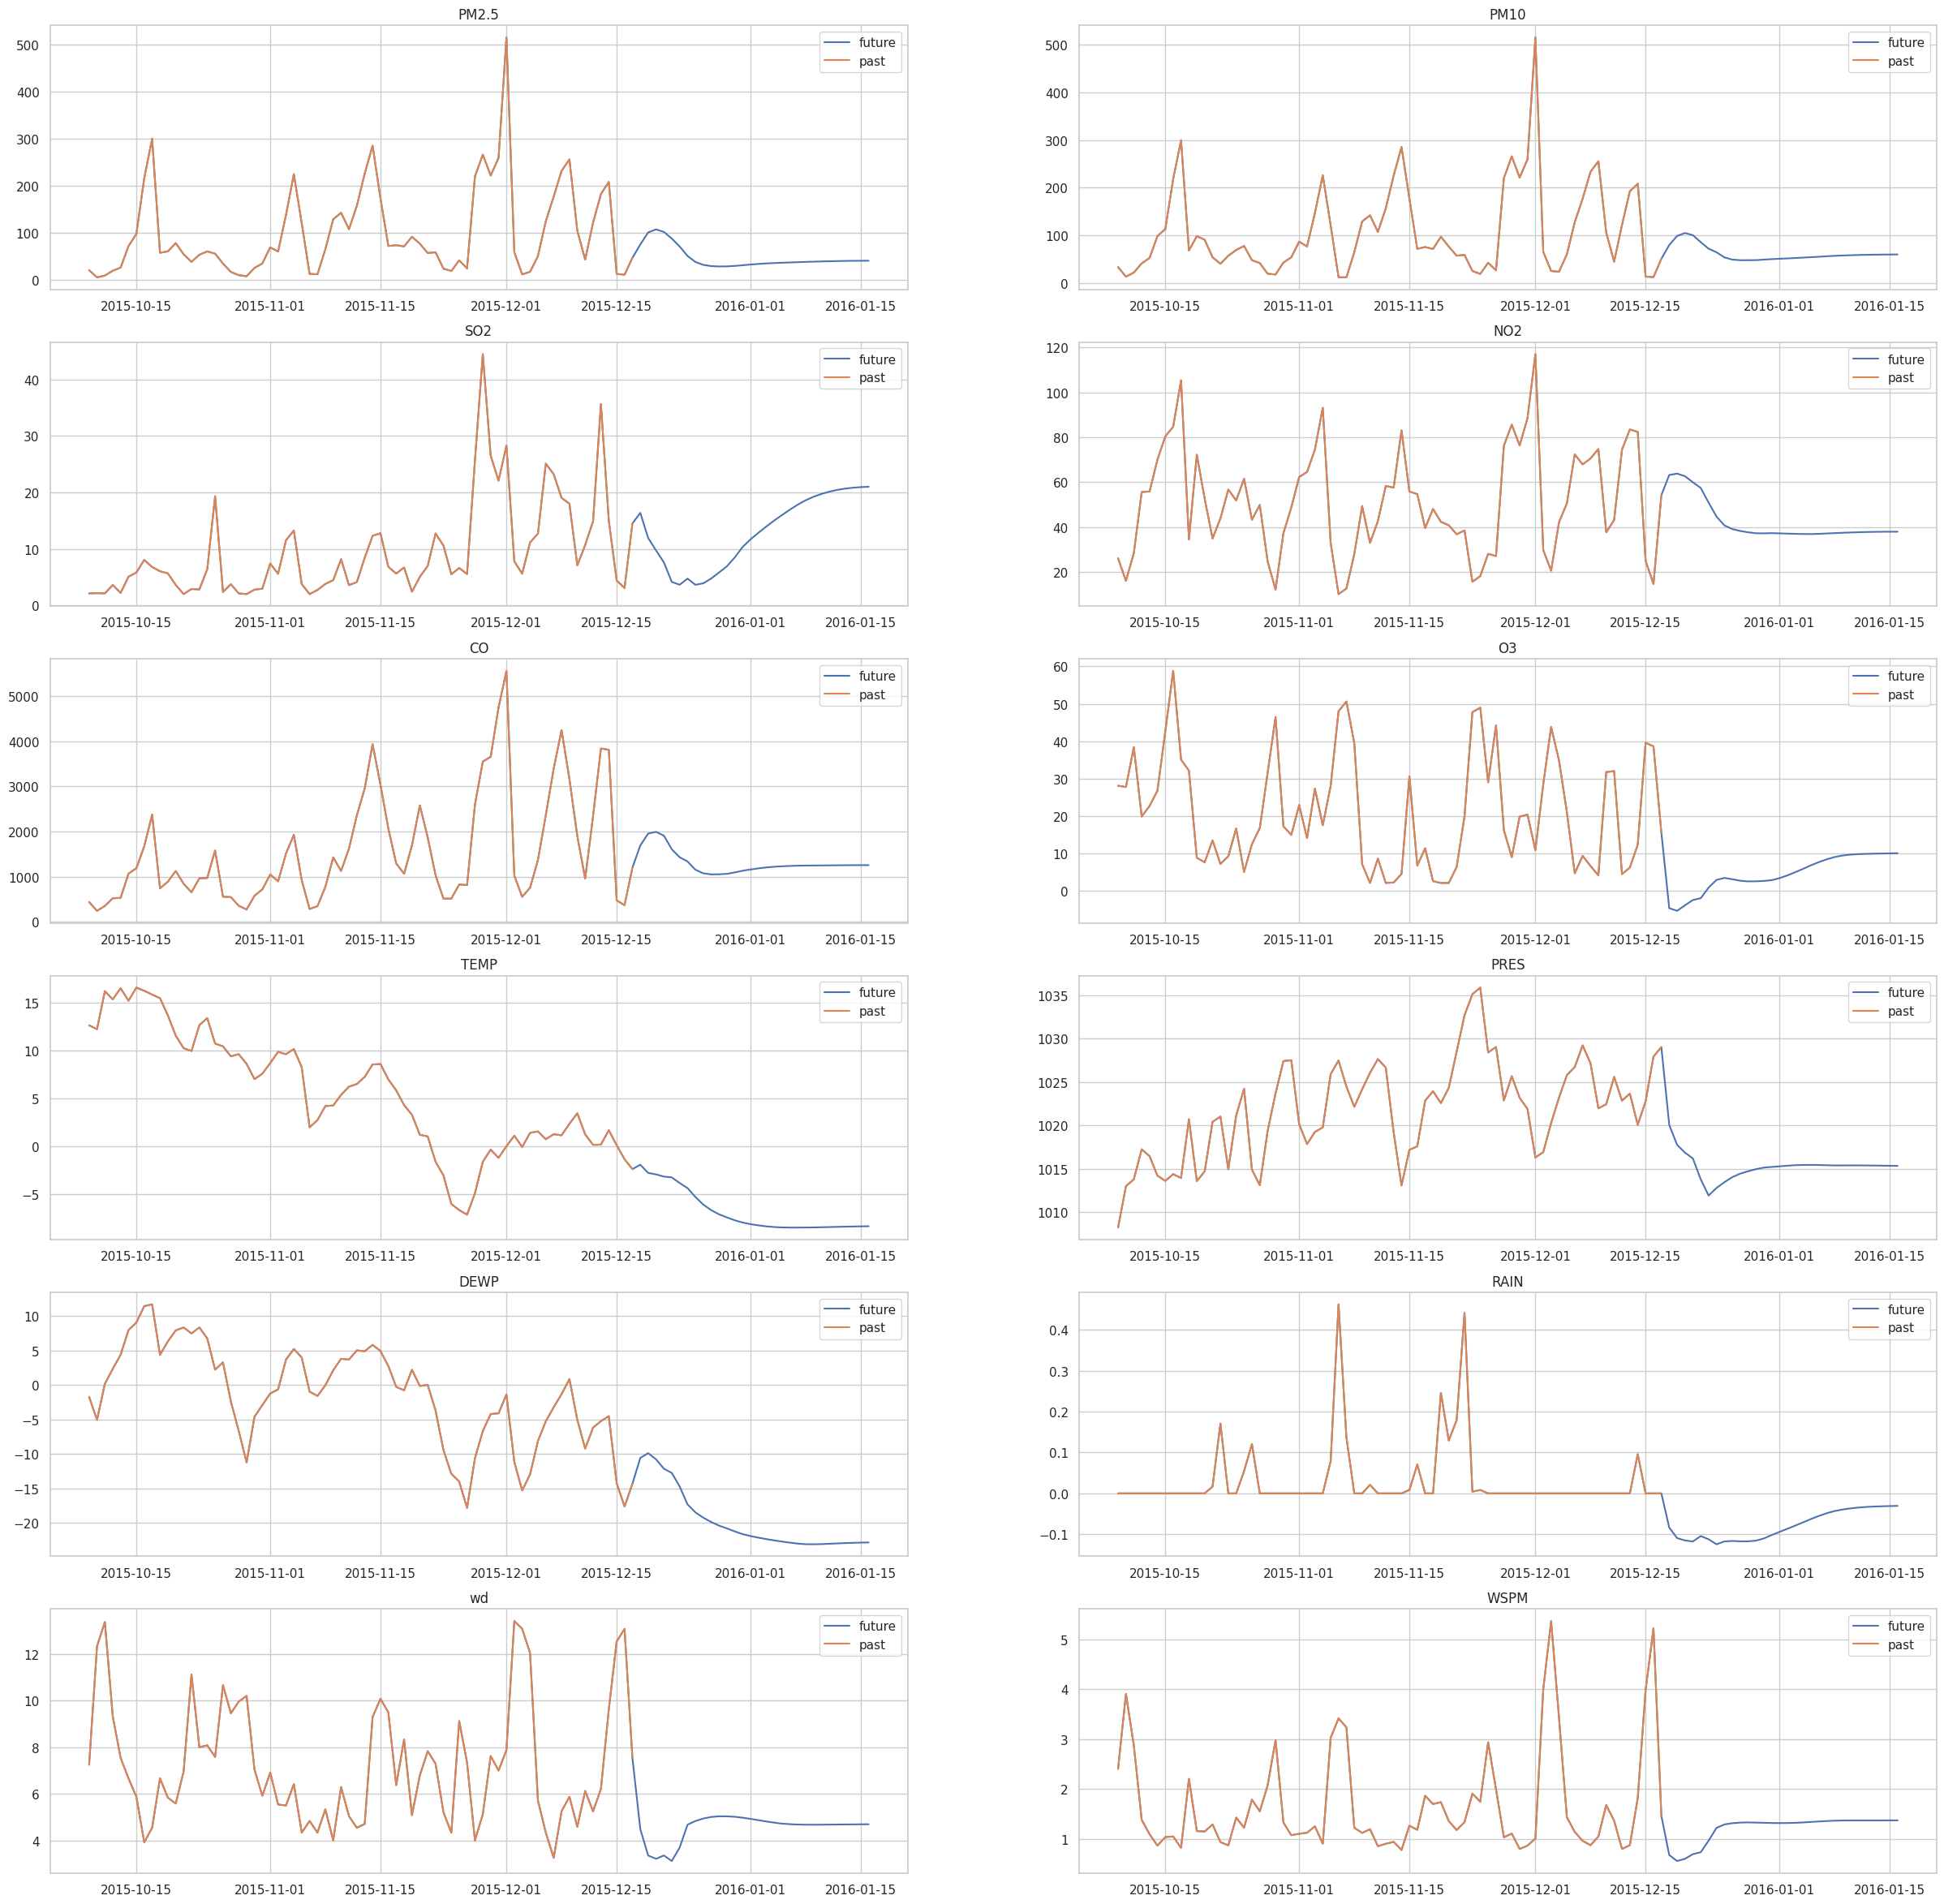

In [323]:
#Predicción futura para Train
plot_Forecasting(30, 70, x_train, y_train, train_dates[n_input:], model1)

1/1 [==============================] - 0s 24ms/step


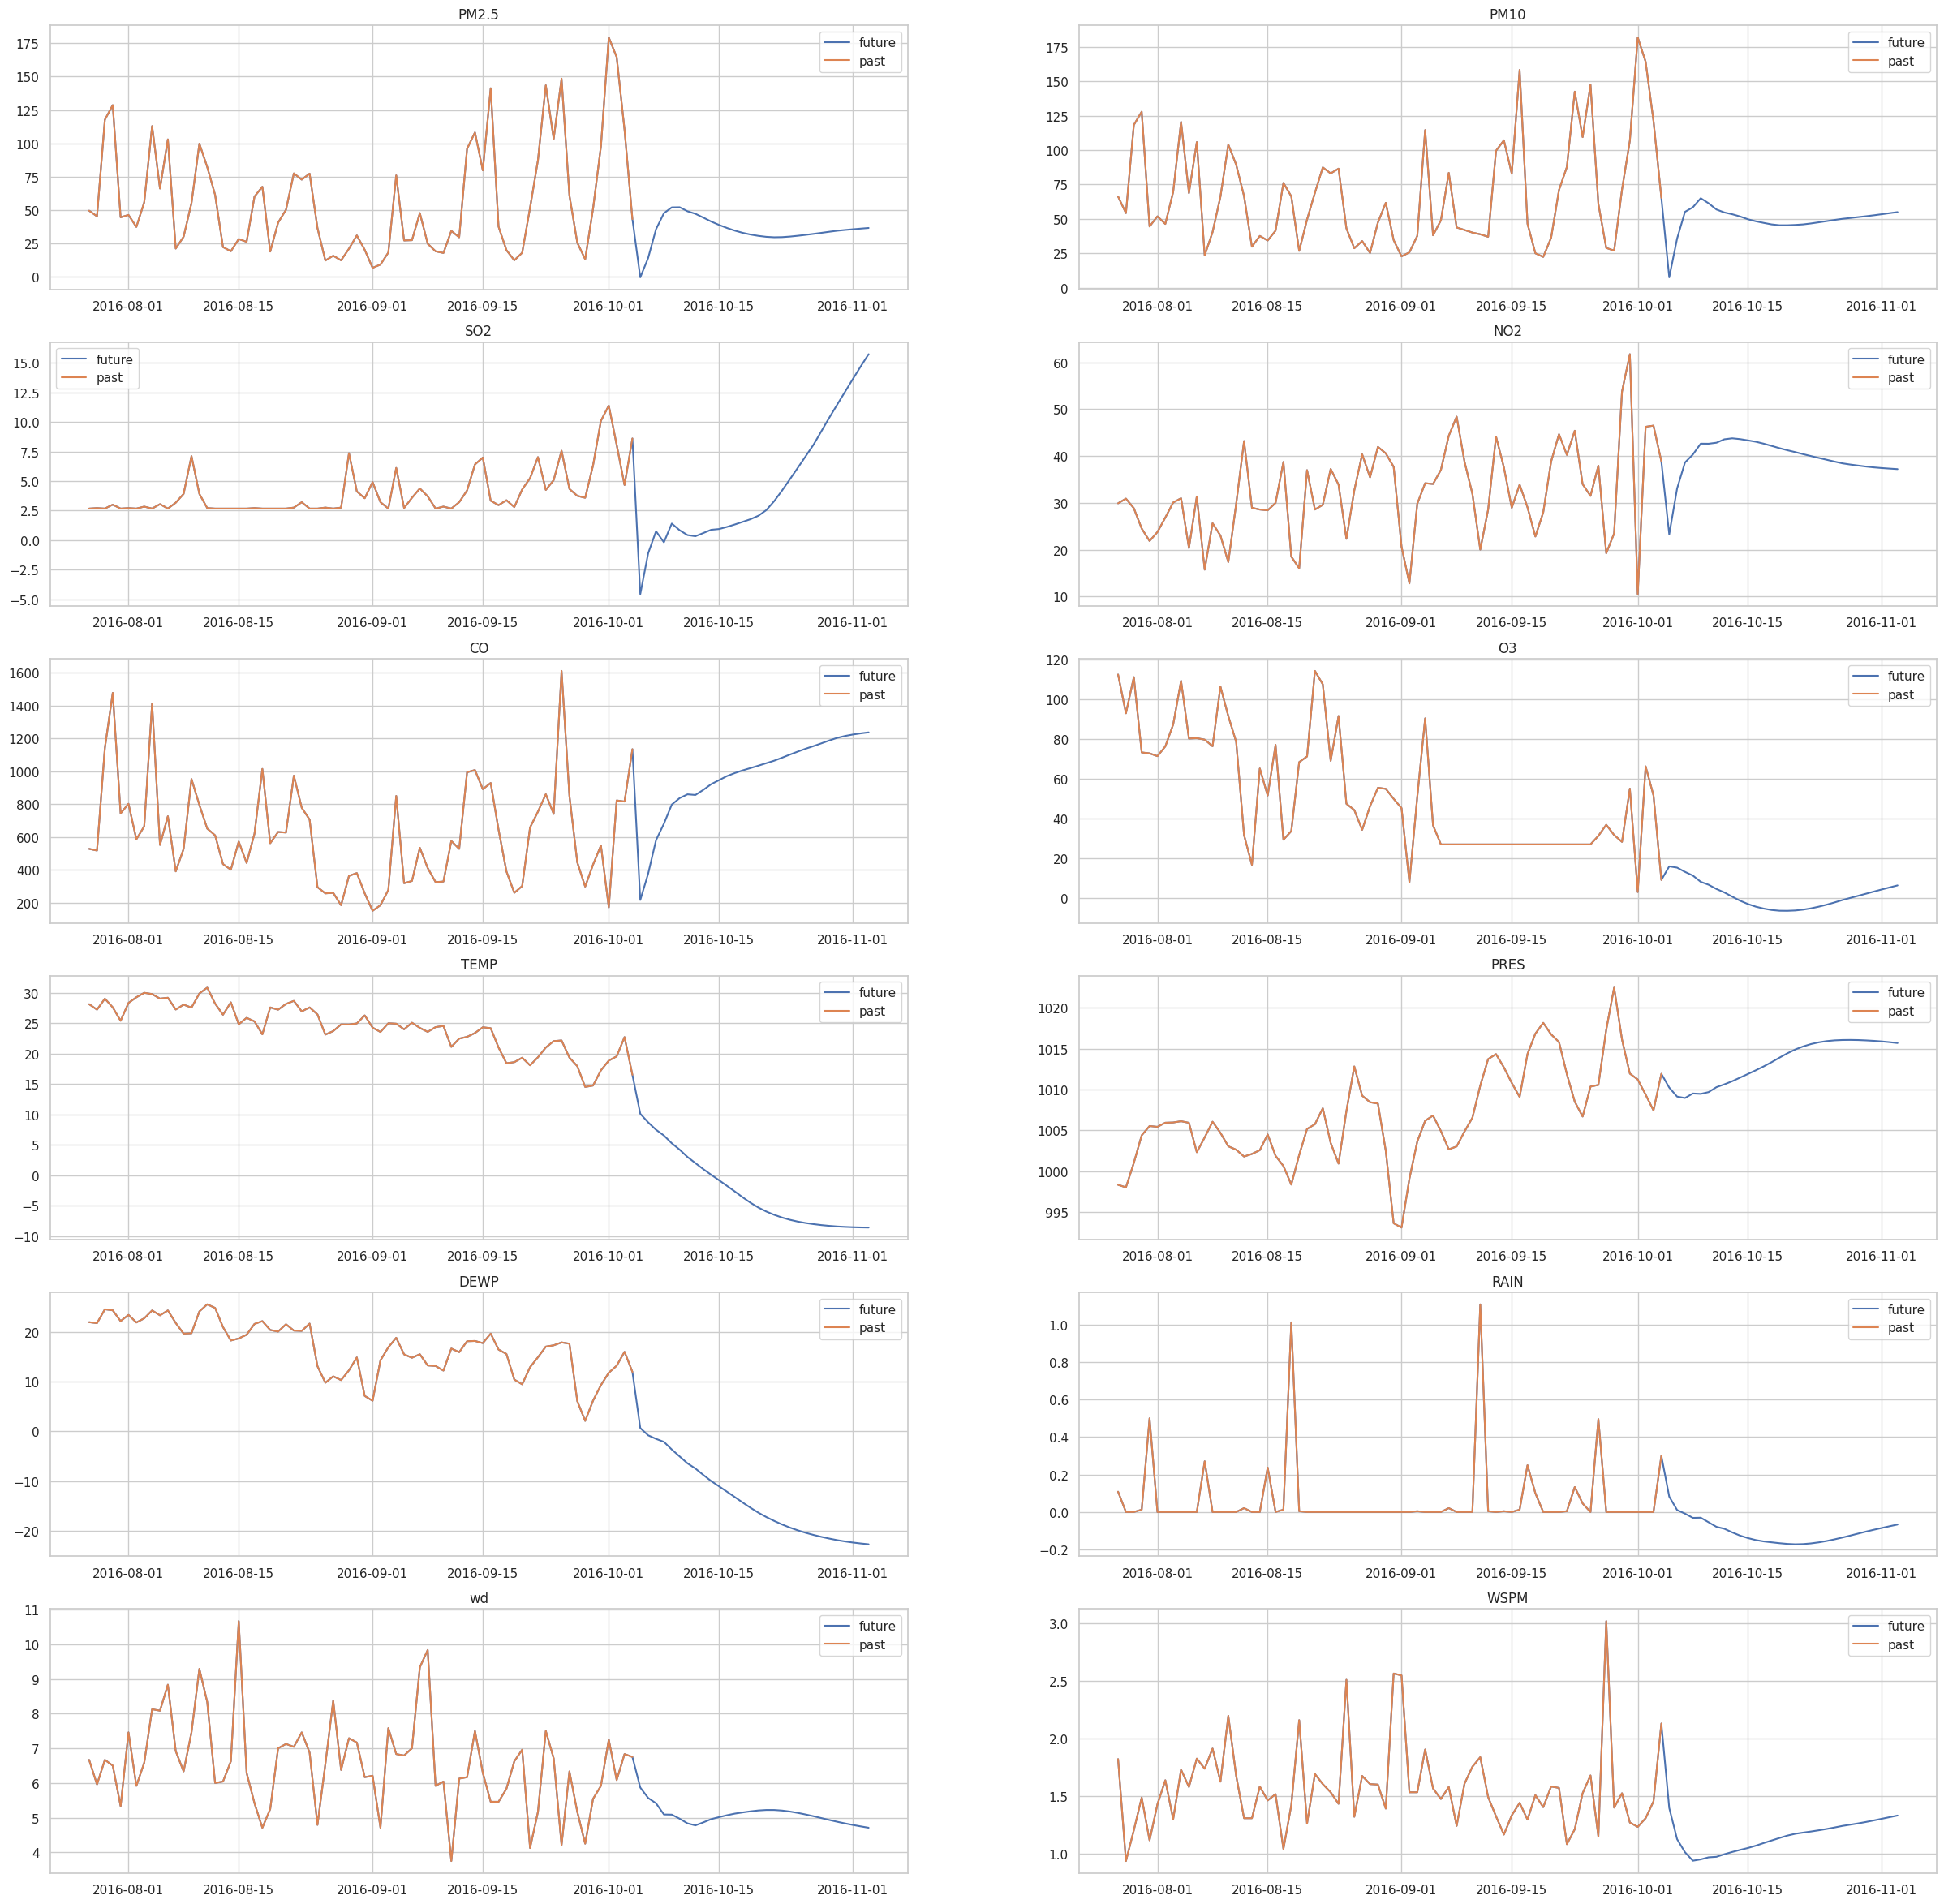

In [324]:
#Predicción futura para el conjunto de Validar
plot_Forecasting(30, 70, x_validate, y_validate, validate_dates[n_input:], model1)

In [325]:
print(y_pred.shape)
print(y_test.shape)

(285, 12)
(140, 12)


In [326]:
if y_pred.shape[0] == y_test.shape[0]:
    # Calcular el Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Calcular el Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
    print('Mean Absolute Percent Error: {:.3f}'.format(mape))
    print('Root Mean Squared Error: {:.3f}'.format(rmse))
else:
    print("Las matrices y_pred y y_test no tienen el mismo número de muestras.")

Las matrices y_pred y y_test no tienen el mismo número de muestras.


In [327]:
y_pred = model1.predict(x_test)
errorAbsoluto = mean_absolute_error(y_test, y_pred)
print(errorAbsoluto)

5/5 [==============================] - 0s 5ms/step
0.09984727887403615


In [328]:
# Calcular Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
# Calcular R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.02024760831454286
Mean Absolute Error (MAE): 0.09984727887403615
R-squared (R2): -0.16665553296353275
